In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.dates as mdates
from datetime import datetime
import matplotlib.pyplot as plt
import glob as gb
import os
import matplotlib.dates as mdates
from cycler import cycler
from collections import OrderedDict
import matplotlib.mlab as ml

%matplotlib notebook

In [2]:
# Save plots?
save = False

In [3]:
# Load HDF file
folder = 'T2_refractive_index_liquids2'
data_folder = '../Data/'  # 'Z:/LabOnChip/Data/'
df = pd.HDFStore(data_folder + str(folder) +'/analysis.h5')['df']

# Create column for time since start of measurement
df['delta'] = (df['datetime']-df['datetime'][0]).fillna(0).astype('timedelta64[us]')/(1E6*60)

df.head()
# df.info()

,datetime,chip,current,fs,humidity,measurementID,medium,n,optical power,sample_no,sweep_no,sweeps,t_in,t_out,tempC,A,tau,c,delta
0,2016-10-10 10:33:06.215211,T2,0.5,0.0001,38.14,T2_refractive_index_liquids2,Air,1.0,0.223463,1000,1,250,21.25,21.25,21.84,0.576252,12.381883,-0.021922,0.000000
1,2016-10-10 10:33:07.065296,T2,0.5,0.0001,38.14,T2_refractive_index_liquids2,Air,1.0,0.223463,1000,2,250,21.25,21.25,21.84,0.575017,12.395170,-0.022141,0.014168
2,2016-10-10 10:33:07.356325,T2,0.5,0.0001,38.14,T2_refractive_index_liquids2,Air,1.0,0.223463,1000,3,250,21.25,21.25,21.84,0.576139,12.386426,-0.021819,0.019019
3,2016-10-10 10:33:07.544344,T2,0.5,0.0001,38.14,T2_refractive_index_liquids2,Air,1.0,0.223463,1000,4,250,21.25,21.25,21.84,0.575834,12.388406,-0.021911,0.022152
4,2016-10-10 10:33:07.726362,T2,0.5,0.0001,38.14,T2_refractive_index_liquids2,Air,1.0,0.223463,1000,5,250,21.25,21.25,21.84,0.577955,12.378261,-0.022086,0.025186


# Real time raw data

In [4]:
# Drop data (error measurements)
to_drop = ['IPA', 'Acetone']
df2 = df[~df['medium'].isin(to_drop)]

<IPython.core.display.Javascript object>


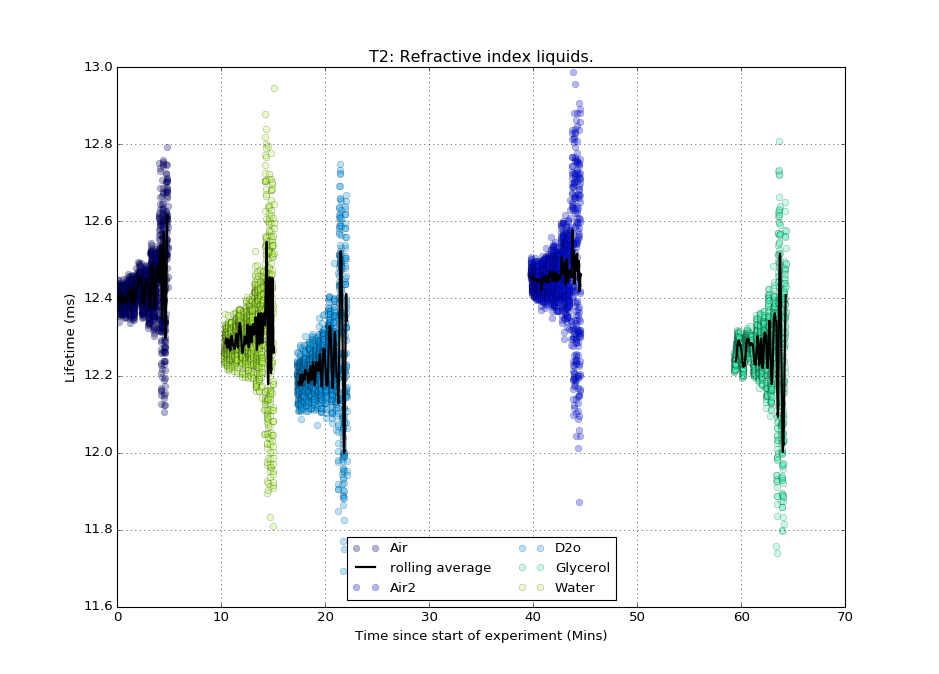

In [5]:
# Create colormap for plotting
n = len(df.medium.unique()) # Number of colors
new_colors = [plt.get_cmap('jet')(1. * i/n) for i in range(n)]
plt.rc('axes', prop_cycle=(cycler('color', new_colors)))

# All in one
fig, ax = plt.subplots()

for key, group in df2.groupby(['medium']):
    ax.plot(group['delta'], group['tau'], 'o', alpha=0.3, label=key)
    rolling = group['tau'].rolling(window=50).mean()
#     ax.plot(group['delta'], rolling, '-', lw=2, label='rolling ({k})'.format(k=key), color='black')
    ax.plot(group['delta'], rolling, '-', lw=2, label='rolling average', color='black')

ax.xaxis.grid(True, which="major")
ax.yaxis.grid()
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='best', ncol=2, fontsize='medium')
plt.xlabel('Time since start of experiment (Mins)')
plt.ylabel('Lifetime (ms)')
plt.title('{}: Refractive index liquids.'.format(df.chip.unique()[0]))
if save:
    plt.savefig(data_folder +  str(folder) + '/lifetimeVsTime.png', dpi=500)

## tau & A vs n

In [7]:
g = df2.groupby(['current', 'n']).agg([np.mean, np.std])
g.head()

fs       humidity           optical power            \
                mean  std      mean       std          mean       std   
current n                                                               
0.1     1.00  0.0001  0.0  37.98518  0.178785      0.029430  0.000174   
        1.33  0.0001  0.0  38.17062  0.127821      0.029546  0.000163   
        1.47  0.0001  0.0  37.38512  0.033030      0.029300  0.000140   
0.2     1.00  0.0001  0.0  37.99560  0.166841      0.081078  0.000315   
        1.33  0.0001  0.0  38.16080  0.129408      0.081126  0.000194   

             sample_no      sweep_no               ...         tempC  \
                  mean  std     mean        std    ...          mean   
current n                                          ...                 
0.1     1.00      1000  0.0    125.5  72.240483    ...      22.02494   
        1.33      1000  0.0    125.5  72.240483    ...      21.94716   
        1.47      1000  0.0    125.5  72.312977    ...      22.56492   
0.2     1.00      1000  0.0    125.5  72.240483    ...      22.01024   
        1.33      1000  0.0    125.5  72.240483    ...      21.93492   

                               A                  tau                   c  \
                   std      mean       std       mean       std      mean   
current n                                                                   
0.1     1.00  0.262500  0.059358  0.005605  12.477845  0.200704 -0.021535   
        1.33  0.052439  0.047562  0.001066  12.313305  0.243810 -0.022389   
        1.47  0.008973  0.045734  0.000722  12.245757  0.235245 -0.022193   
0.2     1.00  0.252152  0.177093  0.016651  12.453681  0.070659 -0.021304   
        1.33  0.056584  0.141593  0.002481  12.292675  0.090899 -0.022304   

                            delta             
                   std       mean        std  
current n                                     
0.1     1.00  0.000647  24.248545  19.872912  
        1.33  0.000213  18.104195   3.527895  
        1.47  0.000168  63.837847   0.262567  
0.2     1.00  0.000668  23.266792  19.870067  
        1.33  0.000213  17.129202   3.529240  

[5 rows x 26 columns]

In [37]:
# Drop unwanted data
df2 = df2[['n', 'current', 'tau', 'A', 'medium']]
# Apply mean and std functions to all collumns
g = df2.groupby(['current', 'n']).agg([np.mean, np.std]).reset_index()
g.head()

current     n        tau                   A          
                      mean       std      mean       std
0     0.1  1.00  12.477845  0.200704  0.059358  0.005605
1     0.1  1.33  12.313305  0.243810  0.047562  0.001066
2     0.1  1.47  12.245757  0.235245  0.045734  0.000722
3     0.2  1.00  12.453681  0.070659  0.177093  0.016651
4     0.2  1.33  12.292675  0.090899  0.141593  0.002481

<IPython.core.display.Javascript object>


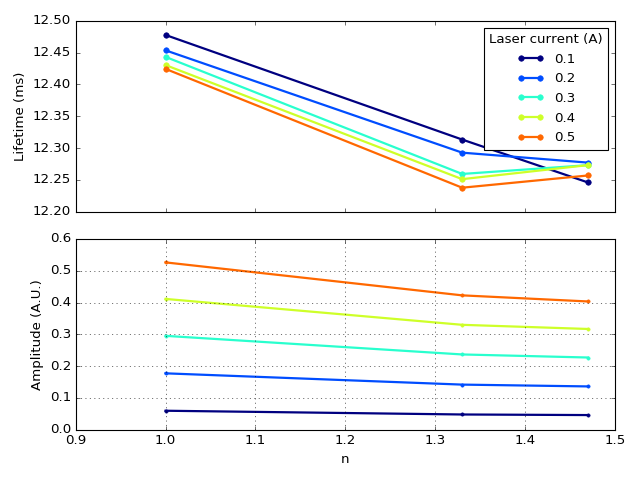

In [38]:
# Create colormap for plotting
num = len(df.current.unique()) # Number of colors
new_colors = [plt.get_cmap('jet')(1. * i/num) for i in range(num)]
plt.rc('axes', prop_cycle=(cycler('color', new_colors)))

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

for key, group in g.groupby('current'):
    ax1.plot(group['n'], group['tau']['mean'], '.-', lw='2', markersize='10', label=key)
    ax2.plot(group['n'], group['A']['mean'], '.-', lw='2', label=key)

ax2.set_xlabel('n')
ax1.set_ylabel('Lifetime (ms)')
ax2.set_ylabel('Amplitude (A.U.)')

ax1.grid()
ax2.grid()
plt.tight_layout()
ax1.ticklabel_format(useOffset=False, axis='y')
ax2.ticklabel_format(useOffset=False, axis='y')
# ax1.set_title('{}: Refractive index liquids.'.format(df.chip.unique()[0]))
ax1.legend(title='Laser current (A)', loc='best', fontsize='medium')
if save:
    plt.savefig(data_folder +  str(folder) + '/final.png', dpi=500)

<IPython.core.display.Javascript object>


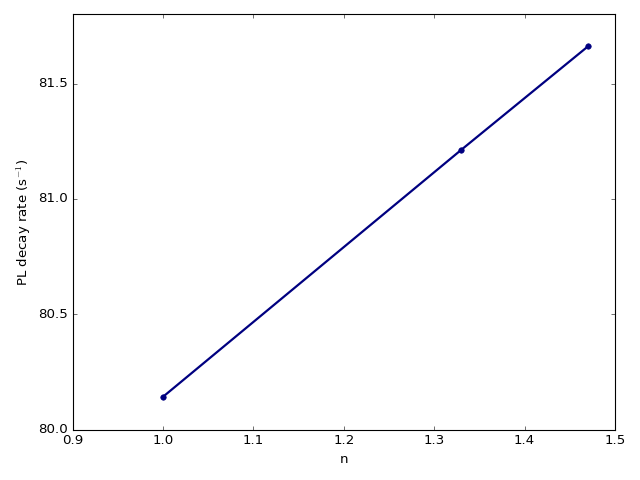

In [45]:
g2 = g[g['current'] == 0.1]

# Two subplots, unpack the axes array immediately
f, ax = plt.subplots()
ax.plot(g2['n'], 1E3/g2['tau']['mean'], '.-', lw='2', markersize='10')
ax.set_xlabel('n')
ax.set_ylabel('PL decay rate (s$^{-1}$)')
ax1.grid()
plt.tight_layout()
ax1.ticklabel_format(useOffset=False, axis='y')
# ax1.set_title('{}: Refractive index liquids.'.format(df.chip.unique()[0]))
if save:
    plt.savefig(data_folder +  str(folder) + '/final.png', dpi=500)

<IPython.core.display.Javascript object>


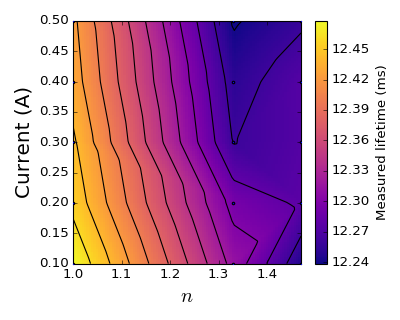

In [21]:
# Contour plot
x = g.n
y = g.current
z = g['tau']['mean']
xi = np.linspace(min(x), max(x), 100)
yi = np.linspace(min(y), max(y), 100)
zi = ml.griddata(x, y, z, xi, yi, interp='linear')

fig = plt.figure(figsize=(5,4)) 
ax = fig.add_subplot(111)
plt.contour(xi, yi, zi, 15, linewidths=1, colors='k')
plt.pcolormesh(xi, yi, zi, cmap=plt.get_cmap('plasma'))
cbar = plt.colorbar()
plt.scatter(x, y, marker='o', c='b', s=5, zorder=10)

plt.xlim(min(x), max(x))
plt.ylim(min(y), max(y))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
cbar.ax.set_ylabel('Measured lifetime (ms)', fontsize=12)
ax.set_xlabel('$n$', fontsize=18)
ax.set_ylabel('Current (A)', fontsize=18)
plt.tight_layout()
if save:
    plt.savefig(data_folder +  str(folder) + '/contour_tau.png', dpi=300)

In [15]:
# Equation for 980 nm laser drive current to power (measured)
def f(x): return 33*x - 1.5

Assume light leaving collimator has a gaussian profile. Hole through which the light goes cuts the beam off at 1/e^2 diameter. Therefore fraction of area under the gaussian curve is

In [16]:
# Convert current to laser power in W/cm^2
y = [f(d) for d in y]

<IPython.core.display.Javascript object>


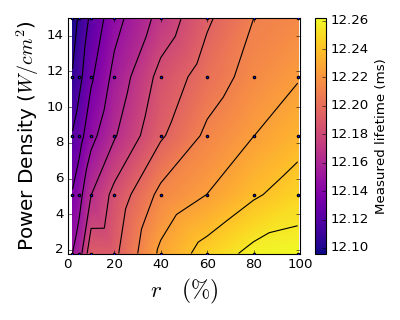

In [19]:
z = g['tau']['mean']
fig = plt.figure(figsize=(5,4)) 
ax = fig.add_subplot(111)
xi = np.linspace(0, 100, 500)
yi = np.linspace(min(y), max(y), 500)
zi = ml.griddata(x, y, z, xi, yi, interp='linear')

plt.contour(xi, yi, zi, 15, linewidths=1, colors='k')
plt.pcolormesh(xi, yi, zi, cmap=plt.get_cmap('plasma'))
cbar = plt.colorbar()
plt.scatter(x, y, marker='o', c='b', s=5, zorder=10)

plt.xlim(0, 100)
plt.ylim(min(y), max(y))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
cbar.ax.set_ylabel('Measured lifetime (ms)', fontsize=12)
ax.set_xlabel(r'$ r \quad (\%)$', fontsize=21)
ax.set_ylabel(r'Power Density ($ W / cm^2$)', fontsize=18)
plt.tight_layout()
if save:
    plt.savefig(data_folder +  str(folder) + '/contour_tau.pdf', dpi=300)
    pass